## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
# Your code here - remember to use markdown cells for comments as well!
%ls

 Volume in drive C has no label.
 Volume Serial Number is 1658-7586

 Directory of c:\Users\DJ\OneDrive - Zero Eyes\DJ\Flatiron\phase_2\project_2\dsc-phase-2-djrachjake

02/10/2023  12:35 PM    <DIR>          .
02/10/2023  12:34 PM    <DIR>          ..
02/10/2023  12:34 PM               163 .canvas
02/10/2023  12:34 PM                70 .gitignore
02/10/2023  12:34 PM             1,846 CONTRIBUTING.md
02/10/2023  12:34 PM    <DIR>          data
02/10/2023  12:35 PM             1,022 dj.ipynb
02/10/2023  12:34 PM         2,930,391 halfway-there.gif
02/10/2023  12:34 PM             1,354 LICENSE.md
02/10/2023  12:34 PM            17,557 README.md
02/10/2023  12:34 PM             1,022 student.ipynb
               8 File(s)      2,953,425 bytes
               3 Dir(s)  246,343,471,104 bytes free


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [3]:
df = pd.read_csv('data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

In [5]:
(df.isna().sum().sort_values(ascending=False))/len(df)

heat_source      0.001061
sewer_system     0.000464
id               0.000000
grade            0.000000
lat              0.000000
address          0.000000
yr_renovated     0.000000
yr_built         0.000000
sqft_patio       0.000000
sqft_garage      0.000000
sqft_basement    0.000000
sqft_above       0.000000
condition        0.000000
date             0.000000
view             0.000000
nuisance         0.000000
greenbelt        0.000000
waterfront       0.000000
floors           0.000000
sqft_lot         0.000000
sqft_living      0.000000
bathrooms        0.000000
bedrooms         0.000000
price            0.000000
long             0.000000
dtype: float64

In [6]:
zips = pd.DataFrame([int(x[-20:-15]) for x in df['address']])
df['zipcode'] = zips
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,zipcode
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052,98055
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591,98133
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520,98178
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020,98118
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188,98027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,7834800180,11/30/2021,1555000.0,5,2.0,1910,4000,1.5,NO,NO,...,1600,1130,0,210,1921,0,"4673 Eastern Avenue North, Seattle, Washington...",47.664740,-122.32940,98103
30151,194000695,6/16/2021,1313000.0,3,2.0,2020,5800,2.0,NO,NO,...,2020,0,0,520,2011,0,"4131 44th Avenue Southwest, Seattle, Washingto...",47.565610,-122.38851,98116
30152,7960100080,5/27/2022,800000.0,3,2.0,1620,3600,1.0,NO,NO,...,940,920,240,110,1995,0,"910 Martin Luther King Jr Way, Seattle, Washin...",47.610395,-122.29585,98122
30153,2781280080,2/24/2022,775000.0,3,2.5,2570,2889,2.0,NO,NO,...,1830,740,480,100,2006,0,"17127 114th Avenue Southeast, Renton, Washingt...",47.449490,-122.18908,98055


In [7]:
df['yr_renovated'].value_counts()

0       28783
2021       69
2006       49
2018       44
1990       42
        ...  
1942        1
1951        1
1948        1
1972        1
1924        1
Name: yr_renovated, Length: 83, dtype: int64

<AxesSubplot:xlabel='yr_built', ylabel='Count'>

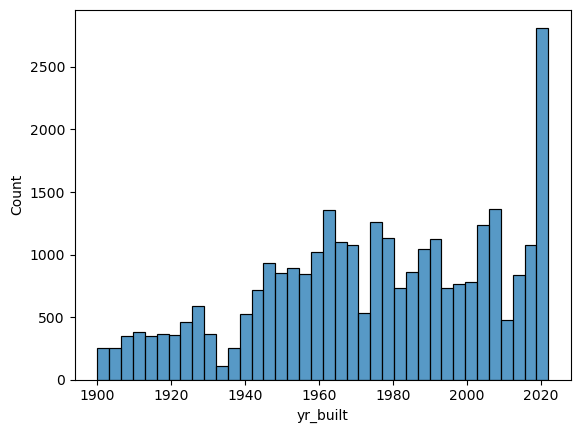

In [8]:
sns.histplot(df['yr_built'])

<AxesSubplot:>

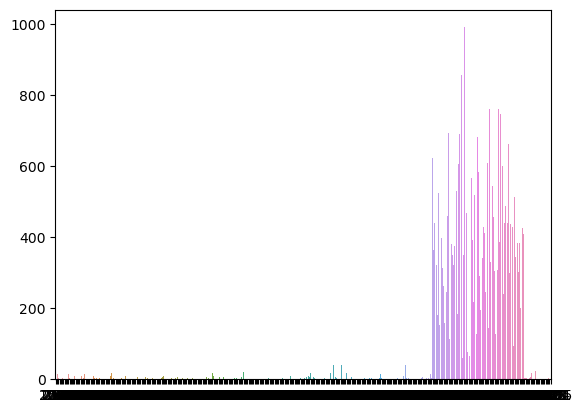

In [9]:
sns.barplot(x = df['zipcode'].value_counts().index, y=df['zipcode'].value_counts().values)

In [10]:
goodzips = []
for key, value in df['zipcode'].value_counts().items():
    if value > 100:
        goodzips.append(key)
    else:
        continue
len(goodzips)
df = df[df['zipcode'].isin(goodzips) == True]

In [11]:
df = df[df['zipcode'].isin(goodzips) == True]

In [12]:
df['sewer_system'].value_counts()

PUBLIC                24612
PRIVATE                4234
PRIVATE RESTRICTED        6
PUBLIC RESTRICTED         2
Name: sewer_system, dtype: int64

In [13]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'greenbelt', 'nuisance', 'view',
       'condition', 'grade', 'heat_source', 'sewer_system', 'sqft_above',
       'sqft_basement', 'sqft_garage', 'sqft_patio', 'yr_built',
       'yr_renovated', 'address', 'lat', 'long', 'zipcode'],
      dtype='object')

In [14]:
df['grade'].value_counts().sort_index()

1 Cabin              2
10 Very Good      1333
11 Excellent       392
12 Luxury          115
13 Mansion          23
2 Substandard        2
3 Poor              13
4 Low               46
5 Fair             375
6 Low Average     2809
7 Average        11381
8 Good            8811
9 Better          3564
Name: grade, dtype: int64

In [15]:
df.loc[df['grade'] == '1 Cabin']

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,zipcode
3431,8046100101,7/22/2021,2500000.0,1,1.0,290,18870,1.0,NO,YES,...,290,0,0,0,1900,0,"160 118th Avenue Southeast, Bellevue, Washingt...",47.608275,-122.182114,98005
28816,2923099027,12/13/2021,205000.0,1,0.0,100,25400,1.0,YES,NO,...,100,0,0,140,1963,0,"49622 172nd Street Southeast, North Bend, Wash...",47.444745,-121.678790,98045


In [16]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'greenbelt', 'nuisance', 'view',
       'condition', 'grade', 'heat_source', 'sewer_system', 'sqft_above',
       'sqft_basement', 'sqft_garage', 'sqft_patio', 'yr_built',
       'yr_renovated', 'address', 'lat', 'long', 'zipcode'],
      dtype='object')

In [17]:
df['ppsq_living'] = (df['price']/df['sqft_living']).round(2)

In [18]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,zipcode,ppsq_living
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052,98055,572.03
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591,98133,332.13
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520,98178,107.99
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020,98118,358.80
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188,98027,529.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30149,9376300851,10/7/2021,719000.0,3,2.5,1270,1141,2.0,NO,NO,...,420,200,60,2007,0,"8359 11th Avenue Northwest, Seattle, Washingto...",47.690440,-122.37062,98117,566.14
30150,7834800180,11/30/2021,1555000.0,5,2.0,1910,4000,1.5,NO,NO,...,1130,0,210,1921,0,"4673 Eastern Avenue North, Seattle, Washington...",47.664740,-122.32940,98103,814.14
30151,194000695,6/16/2021,1313000.0,3,2.0,2020,5800,2.0,NO,NO,...,0,0,520,2011,0,"4131 44th Avenue Southwest, Seattle, Washingto...",47.565610,-122.38851,98116,650.00
30152,7960100080,5/27/2022,800000.0,3,2.0,1620,3600,1.0,NO,NO,...,920,240,110,1995,0,"910 Martin Luther King Jr Way, Seattle, Washin...",47.610395,-122.29585,98122,493.83


In [19]:
price_zipcode = df.groupby('zipcode').mean()['ppsq_living'].sort_values(ascending=False)

In [20]:
df['ppsq_living'].mean()

558.3414300561207

<AxesSubplot:xlabel='zipcode'>

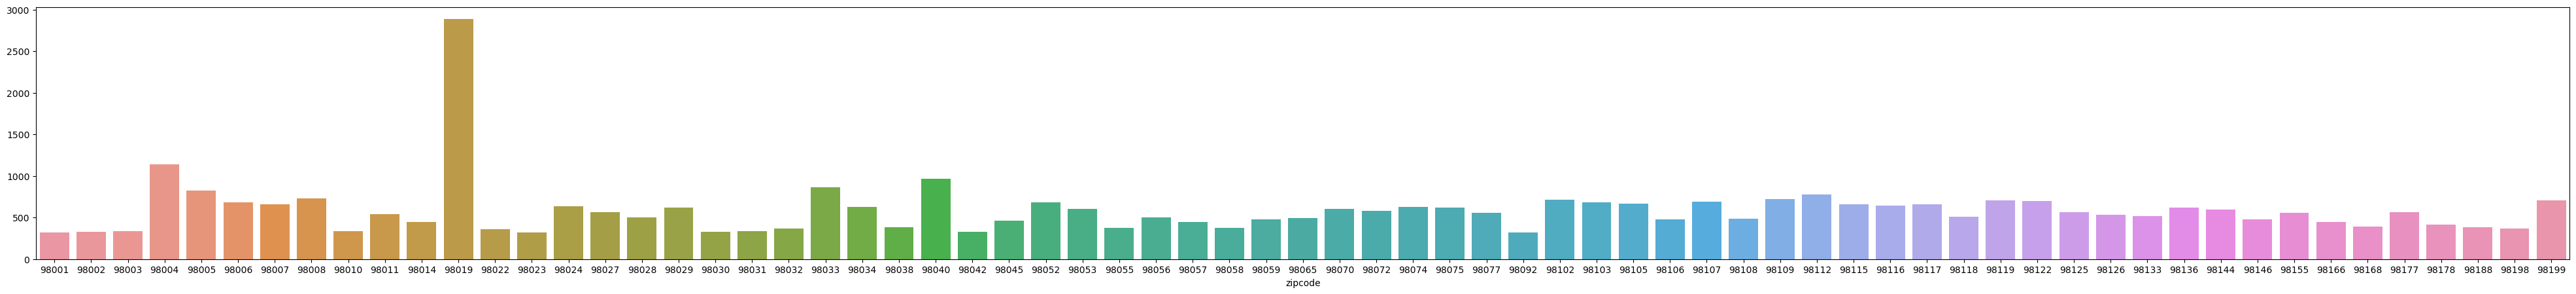

In [21]:
fig, ax = plt.subplots(figsize=(50, 5))

sns.barplot(x=price_zipcode.index, y=price_zipcode.values)

In [22]:
df[df['zipcode'] == 98019].sort_values('ppsq_living', ascending=False)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,zipcode,ppsq_living
14977,1549500215,12/17/2021,1803000.0,4,4.0,3,326701,2.0,NO,NO,...,1,1,0,2021,0,"31072 Northeast 165th Street, Duvall, Washingt...",47.745290,-121.923620,98019,601000.00
22973,7325800110,3/3/2022,2530000.0,3,1.5,1380,94960,1.0,NO,NO,...,0,0,0,1969,0,"26869 Northeast 143rd Place, Duvall, Washingto...",47.729810,-121.977510,98019,1833.33
26052,2426069044,8/6/2021,1750000.0,4,1.0,1080,117346,1.5,NO,NO,...,720,0,50,1941,0,"14434 Carnation-Duvall Road Northeast, Duvall,...",47.731990,-121.986990,98019,1620.37
27213,1550000645,5/30/2022,1125000.0,1,1.0,860,426779,1.0,NO,NO,...,0,0,100,1980,1996,"20210 320th Avenue Northeast, Duvall, Washingt...",47.775000,-121.907925,98019,1308.14
22729,4047200425,7/7/2021,720000.0,2,1.0,670,14136,1.0,YES,NO,...,0,0,290,1963,0,"19719 330th Avenue Northeast, Duvall, Washingt...",47.768355,-121.897015,98019,1074.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4698,7299010300,6/24/2021,509016.0,4,3.5,2130,1819,2.0,NO,NO,...,980,500,140,2021,0,"14039 3rd Avenue Northeast, Duvall, Washington...",47.727710,-121.981010,98019,238.97
19518,226069005,7/29/2021,750000.0,4,2.5,3460,921729,2.0,NO,NO,...,0,440,130,1995,0,"19919 West Snoqualmie Valley Road Northeast, D...",47.774080,-122.007050,98019,216.76
14864,2130701740,10/14/2021,425000.0,3,2.0,2030,7670,2.0,NO,NO,...,800,0,310,1949,1976,"26637 Northeast Stella Street, Duvall, Washing...",47.740610,-121.982095,98019,209.36
12915,8567450010,2/17/2022,479301.0,5,2.5,3380,9358,2.0,NO,NO,...,0,540,0,2003,0,"27804 Northeast 154th Street, Duvall, Washingt...",47.738895,-121.966810,98019,141.81


In [23]:
df.sort_values('ppsq_living', ascending=False).head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,zipcode,ppsq_living
14977,1549500215,12/17/2021,1803000.0,4,4.0,3,326701,2.0,NO,NO,...,1,1,0,2021,0,"31072 Northeast 165th Street, Duvall, Washingt...",47.745290,-121.923620,98019,601000.00
5811,2424049035,8/19/2021,13950000.0,0,1.0,290,178017,1.0,YES,NO,...,0,0,160,1940,0,"5045 Forest Avenue Southeast, Mercer Island, W...",47.556910,-122.230600,98040,48103.45
9516,3424059021,5/16/2022,15740000.0,2,1.0,1010,68824,1.0,NO,NO,...,1010,0,150,1959,0,"8430 138th Avenue Southeast, Newcastle, Washin...",47.526320,-122.156820,98059,15584.16
23470,5026900270,11/4/2021,30750000.0,1,3.5,2040,50705,2.0,YES,NO,...,410,0,890,1989,0,"1620 Lake Washington Boulevard, Seattle, Washi...",47.615910,-122.280880,98122,15073.53
6125,1424059028,3/10/2022,4000000.0,1,1.0,400,163785,1.0,NO,YES,...,0,400,0,1955,0,"16010 Southeast 45th Street, Bellevue, Washing...",47.565930,-122.126325,98006,10000.00
5852,3345700017,6/1/2022,8500000.0,1,1.0,900,75226,1.0,NO,NO,...,900,1750,480,1989,0,"2020 Northeast 40th Street, Renton, Washington...",47.527690,-122.191980,98056,9444.44
3431,8046100101,7/22/2021,2500000.0,1,1.0,290,18870,1.0,NO,YES,...,0,0,0,1900,0,"160 118th Avenue Southeast, Bellevue, Washingt...",47.608275,-122.182114,98005,8620.69
247,3342103985,6/15/2021,4900000.0,1,1.0,570,36944,1.5,YES,NO,...,0,0,0,1947,0,"2905 Mountain View Avenue North, Renton, Washi...",47.517805,-122.210285,98056,8596.49
22709,1346300200,6/25/2021,5000000.0,1,1.0,620,22690,1.0,NO,NO,...,620,620,0,1904,0,"1409 East Prospect Street, Seattle, Washington...",47.628190,-122.314075,98112,8064.52
4455,7768700180,1/19/2022,7000000.0,2,1.0,910,14750,1.0,YES,NO,...,910,0,0,1945,0,"9532 Southeast Shoreland Drive, Bellevue, Wash...",47.607060,-122.211070,98004,7692.31


In [24]:
df['sqft_living'].describe()

count    28866.000000
mean      2129.628386
std        971.819466
min          3.000000
25%       1440.000000
50%       1950.000000
75%       2640.000000
max      15360.000000
Name: sqft_living, dtype: float64

In [25]:
df['ppsq_lot'] = (df['price']/df['sqft_lot']).round(2) #feature engineering lot price per square ft

In [26]:
pricelot_zipcode = df.groupby('zipcode').mean()['ppsq_lot'].sort_values(ascending=False)

<AxesSubplot:xlabel='zipcode'>

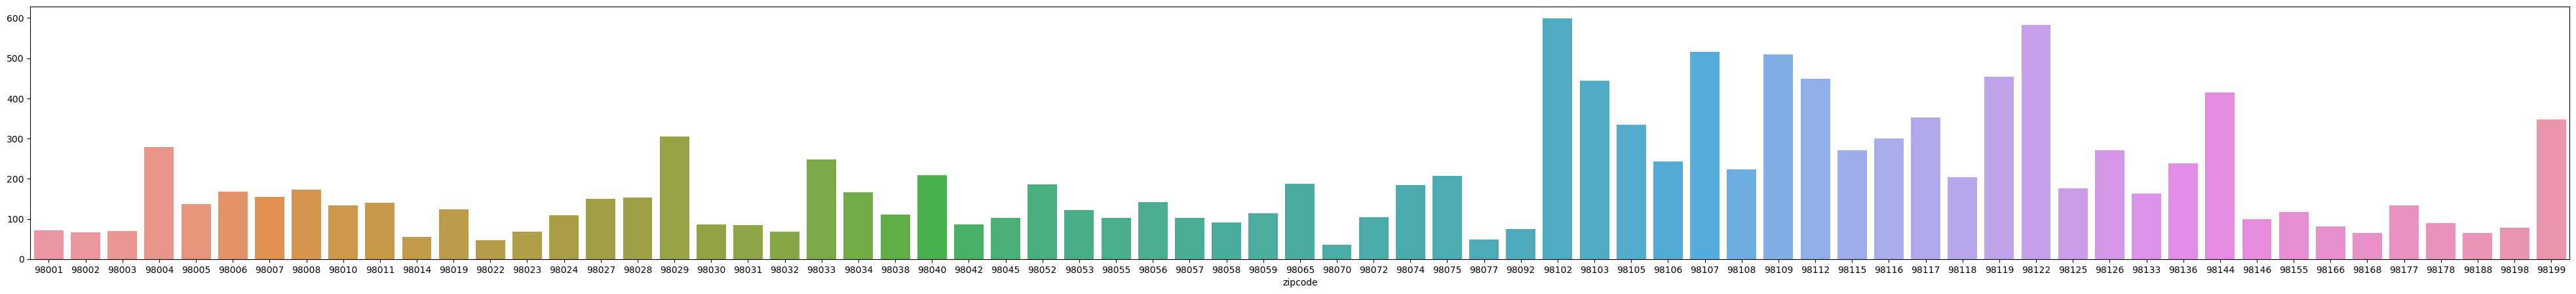

In [27]:
fig, ax = plt.subplots(figsize=(50, 5))

sns.barplot(x=pricelot_zipcode.index, y=pricelot_zipcode.values)

In [28]:
df = df[df['sqft_living'] > 400] #dropping all tiny homes from the data set

In [29]:
df['sewer_system'].value_counts()

PUBLIC                24591
PRIVATE                4228
PRIVATE RESTRICTED        5
PUBLIC RESTRICTED         2
Name: sewer_system, dtype: int64

In [30]:
for x in df[['waterfront', 'greenbelt', 'nuisance']]: # converting YES and NO to 1 and 0
    df[x] = df[x].replace("NO", 0).replace("YES", 1)

C:\Users\DJ\AppData\Local\Temp\ipykernel_9560\536271793.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[x] = df[x].replace("NO", 0).replace("YES", 1)


In [31]:
df[['waterfront', 'greenbelt', 'nuisance']].sum()/len(df)

waterfront    0.017305
greenbelt     0.026633
nuisance      0.171002
dtype: float64

In [32]:
df.drop(['address', 'lat', 'long'], axis=1, inplace=True)
df

C:\Users\DJ\AppData\Local\Temp\ipykernel_9560\2088199881.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['address', 'lat', 'long'], axis=1, inplace=True)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,zipcode,ppsq_living,ppsq_lot
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,0,0,...,PUBLIC,1180,0,0,40,1969,0,98055,572.03,94.54
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,0,0,...,PUBLIC,1570,1570,0,240,1950,0,98133,332.13,137.25
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,0,0,...,PUBLIC,1580,1580,0,0,1956,0,98178,107.99,50.52
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,0,0,...,PUBLIC,1090,1070,200,270,2010,0,98118,358.80,553.57
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,0,0,...,PUBLIC,1120,550,550,30,2012,0,98027,529.02,781.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30149,9376300851,10/7/2021,719000.0,3,2.5,1270,1141,2.0,0,0,...,PUBLIC,1050,420,200,60,2007,0,98117,566.14,630.15
30150,7834800180,11/30/2021,1555000.0,5,2.0,1910,4000,1.5,0,0,...,PUBLIC,1600,1130,0,210,1921,0,98103,814.14,388.75
30151,194000695,6/16/2021,1313000.0,3,2.0,2020,5800,2.0,0,0,...,PUBLIC,2020,0,0,520,2011,0,98116,650.00,226.38
30152,7960100080,5/27/2022,800000.0,3,2.0,1620,3600,1.0,0,0,...,PUBLIC,940,920,240,110,1995,0,98122,493.83,222.22


In [33]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'greenbelt', 'nuisance', 'view',
       'condition', 'grade', 'heat_source', 'sewer_system', 'sqft_above',
       'sqft_basement', 'sqft_garage', 'sqft_patio', 'yr_built',
       'yr_renovated', 'zipcode', 'ppsq_living', 'ppsq_lot'],
      dtype='object')

In [34]:
df['view'].value_counts(normalize=True)

NONE         0.879179
AVERAGE      0.065092
GOOD         0.029754
EXCELLENT    0.018588
FAIR         0.007387
Name: view, dtype: float64

In [35]:
0.018588*len(df)

536.003568

In [36]:
df.groupby('view').mean()['price'].sort_values(ascending=False)

view
EXCELLENT    2.883073e+06
FAIR         1.741269e+06
GOOD         1.732077e+06
AVERAGE      1.457095e+06
NONE         1.018535e+06
Name: price, dtype: float64

In [37]:
df['price'].describe()

count    2.883600e+04
mean     1.108309e+06
std      8.609797e+05
min      2.756300e+04
25%      6.500000e+05
50%      8.700000e+05
75%      1.310250e+06
max      3.075000e+07
Name: price, dtype: float64

<AxesSubplot:xlabel='price', ylabel='Count'>

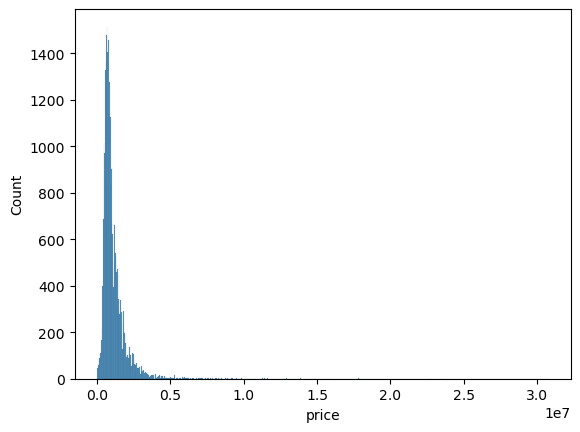

In [38]:
sns.histplot(df['price'])

c:\Users\DJ\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

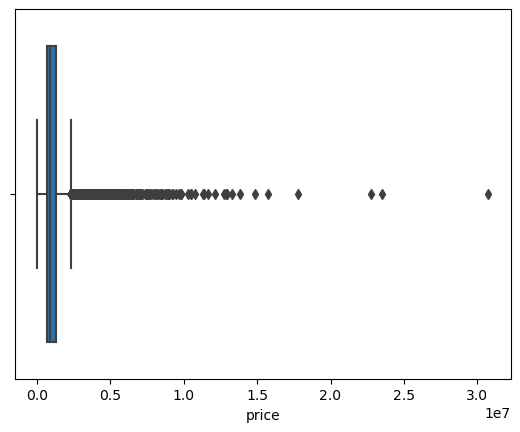

In [39]:
sns.boxplot(df['price'])

In [40]:
iqrprice = np.percentile(df['price'], 75) -np.percentile(df['price'], 25) ##calculating the upper and lower limits for outliers using iqr*1.5
lower_lim_price =np.percentile(df['price'], 25) - 1.5*iqrprice
upper_lim_price =np.percentile(df['price'], 75) + 1.5*iqrprice
print(f'anything above {upper_lim_price} and below {lower_lim_price} is an outlier')

anything above 2300625.0 and below -340375.0 is an outlier


In [41]:
df = df[df['price'] < 2300625.0] #filtering out the outliers based the above

In [42]:
df.shape

(27014, 25)

c:\Users\DJ\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

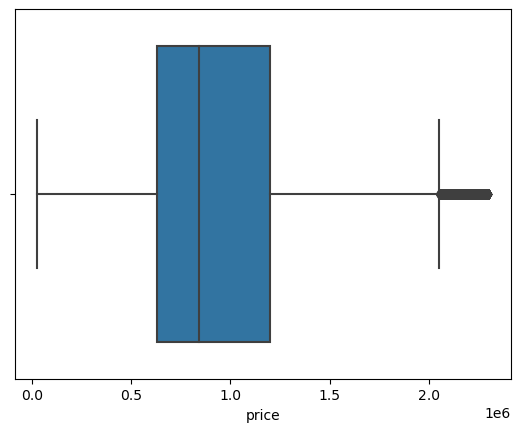

In [43]:
sns.boxplot(df['price'])

<AxesSubplot:xlabel='price', ylabel='Count'>

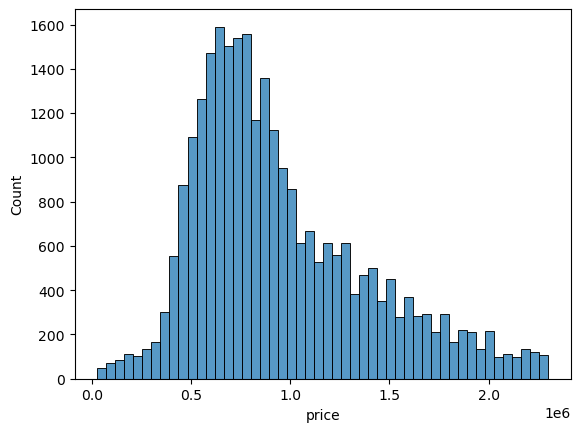

In [44]:
sns.histplot(df['price'], bins=50)

In [45]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,zipcode,ppsq_living,ppsq_lot
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,0,0,...,PUBLIC,1180,0,0,40,1969,0,98055,572.03,94.54
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,0,0,...,PUBLIC,1570,1570,0,240,1950,0,98133,332.13,137.25
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,0,0,...,PUBLIC,1580,1580,0,0,1956,0,98178,107.99,50.52
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,0,0,...,PUBLIC,1090,1070,200,270,2010,0,98118,358.80,553.57
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,0,0,...,PUBLIC,1120,550,550,30,2012,0,98027,529.02,781.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30149,9376300851,10/7/2021,719000.0,3,2.5,1270,1141,2.0,0,0,...,PUBLIC,1050,420,200,60,2007,0,98117,566.14,630.15
30150,7834800180,11/30/2021,1555000.0,5,2.0,1910,4000,1.5,0,0,...,PUBLIC,1600,1130,0,210,1921,0,98103,814.14,388.75
30151,194000695,6/16/2021,1313000.0,3,2.0,2020,5800,2.0,0,0,...,PUBLIC,2020,0,0,520,2011,0,98116,650.00,226.38
30152,7960100080,5/27/2022,800000.0,3,2.0,1620,3600,1.0,0,0,...,PUBLIC,940,920,240,110,1995,0,98122,493.83,222.22


In [46]:
df.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.566396
ppsq_living      0.488338
sqft_above       0.479289
bathrooms        0.437586
bedrooms         0.314319
sqft_patio       0.248916
sqft_garage      0.234004
floors           0.220224
ppsq_lot         0.212681
sqft_basement    0.202424
greenbelt        0.108621
yr_built         0.088376
sqft_lot         0.075333
yr_renovated     0.055562
waterfront       0.035027
id               0.000485
nuisance        -0.016071
zipcode         -0.052313
Name: price, dtype: float64

In [47]:
viewdummy = pd.get_dummies(df['view'], drop_first=True, prefix='view')
viewdata = pd.concat([df['price'],viewdummy], axis=1)
viewdata.corr()['price'].sort_values(ascending=False)

price             1.000000
view_GOOD         0.111372
view_EXCELLENT    0.089546
view_FAIR         0.051710
view_NONE        -0.193148
Name: price, dtype: float64

In [48]:
X_ohe = sm.add_constant( viewdata.drop(['price'], axis=1))

all_mod = sm.OLS(viewdata['price'], X_ohe)

all_results = all_mod.fit()
print(all_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     277.2
Date:                Fri, 10 Feb 2023   Prob (F-statistic):          6.16e-234
Time:                        15:35:20   Log-Likelihood:            -3.8900e+05
No. Observations:               27014   AIC:                         7.780e+05
Df Residuals:                   27009   BIC:                         7.781e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.156e+06   1.07e+04    108.

<AxesSubplot:xlabel='bedrooms', ylabel='Count'>

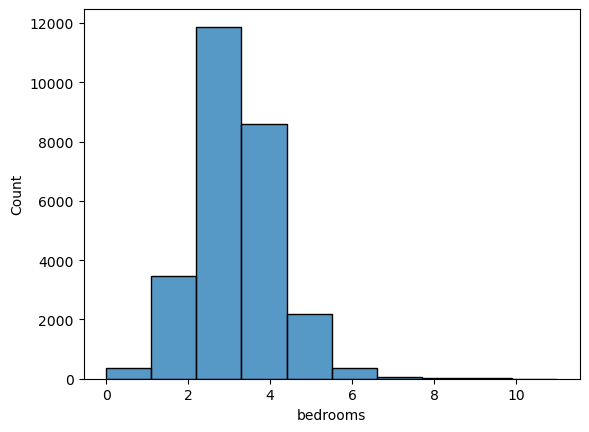

In [51]:
sns.histplot(df['bedrooms'], bins=10)

In [55]:
pricebybedrooms=df.groupby('bedrooms').mean()['price'].sort_index()

<AxesSubplot:xlabel='bedrooms'>

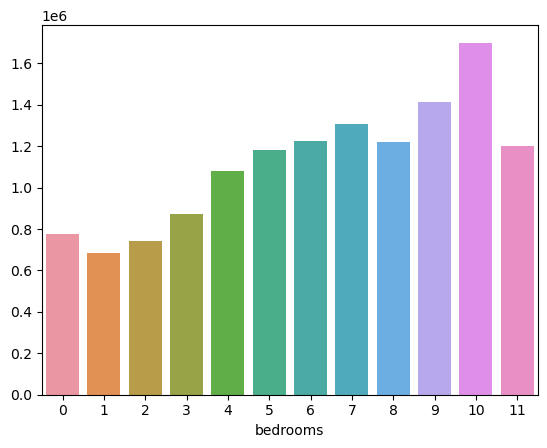

In [56]:
sns.barplot(x=pricebybedrooms.index, y=pricebybedrooms.values)

c:\Users\DJ\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bedrooms'>

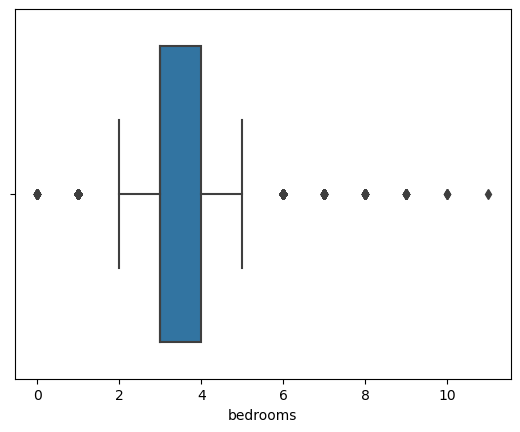

In [58]:
sns.boxplot(df['bedrooms'])

In [59]:
iqrbedrooms = np.percentile(df['bedrooms'], 75) -np.percentile(df['bedrooms'], 25) ##calculating the upper and lower limits for outliers using iqr*1.5
lower_lim_bedrooms =np.percentile(df['bedrooms'], 25) - 1.5*iqrbedrooms
upper_lim_bedrooms =np.percentile(df['bedrooms'], 75) + 1.5*iqrbedrooms
print(f'anything above {upper_lim_bedrooms} and below {lower_lim_bedrooms} is an outlier')

anything above 5.5 and below 1.5 is an outlier
